In [69]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [70]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N,D = X_train.shape

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [73]:
# convert data into torch tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [74]:
# Build the model
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [75]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [76]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

train_acc_values = []
test_acc_values = []

for epoch in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward pass
  loss.backward()
  optimizer.step()

  # Get the test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  #save losses
  train_losses[epoch] = loss.item()
  test_losses[epoch] = loss_test.item()


  if(epoch+1)%50 == 0:
    print(f"Epoch {epoch+1}/{n_epochs}, Train loss: {loss.item():.4f}, Test loss: {loss_test.item():.4f}")


Epoch 50/1000, Train loss: 0.4869, Test loss: 0.4807
Epoch 100/1000, Train loss: 0.3606, Test loss: 0.3655
Epoch 150/1000, Train loss: 0.2917, Test loss: 0.3018
Epoch 200/1000, Train loss: 0.2482, Test loss: 0.2606
Epoch 250/1000, Train loss: 0.2180, Test loss: 0.2315
Epoch 300/1000, Train loss: 0.1958, Test loss: 0.2097
Epoch 350/1000, Train loss: 0.1786, Test loss: 0.1928
Epoch 400/1000, Train loss: 0.1648, Test loss: 0.1794
Epoch 450/1000, Train loss: 0.1536, Test loss: 0.1684
Epoch 500/1000, Train loss: 0.1441, Test loss: 0.1593
Epoch 550/1000, Train loss: 0.1361, Test loss: 0.1517
Epoch 600/1000, Train loss: 0.1291, Test loss: 0.1453
Epoch 650/1000, Train loss: 0.1230, Test loss: 0.1397
Epoch 700/1000, Train loss: 0.1176, Test loss: 0.1349
Epoch 750/1000, Train loss: 0.1128, Test loss: 0.1307
Epoch 800/1000, Train loss: 0.1084, Test loss: 0.1271
Epoch 850/1000, Train loss: 0.1045, Test loss: 0.1238
Epoch 900/1000, Train loss: 0.1010, Test loss: 0.1209
Epoch 950/1000, Train loss: 0

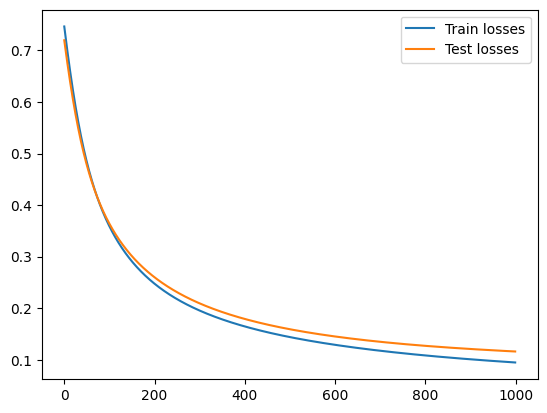

In [77]:
# Plot the train and test lossed per iteration
plt.plot(train_losses, label='Train losses')
plt.plot(test_losses, label='Test losses')
plt.legend()
plt.show()

In [78]:
# Get Accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")

Train accuracy: 0.9895, Test accuracy: 0.9681
